## Boston_housing 자료 딥러닝으로 분석

In [1]:
# 모듈 로딩
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense 
from keras import Sequential
from sklearn.model_selection import train_test_split
from keras.datasets.boston_housing import load_data

In [2]:
# 데이터 로딩 train: test = 8:2
(train_x, train_y), (test_x, test_y) = load_data()

57026/57026 [==============================] - 0s 0us/step


In [4]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(404, 13) (404,)
(102, 13) (102,)


### 전처리
- 특성 feature 전처리
    - 수치 데이터 : 값의 범위
    - 문자 데이터 : 수치화
- 함수 : StandardScaler, MinMaxScaler, RobustScaler

In [65]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit(train_x)
train_x = st.transform(train_x)
test_x = st.transform(test_x)

### NN model 실습
1. 모델 구상
2. 모델 생성
3. 학습
4. 평가
5. 테스트

### 1. 모델 구상
- 입력 데이터 -> 13개 feature
- 출력 데이터 -> train_y

In [66]:
md = Sequential(name='Boston')
md.add(Dense(60, activation='relu', input_shape=(13,), name='hidden-1'))
md.add(Dense(60, activation='relu', name='hidden-2'))
# 회귀의 출력층은 1이어야 한다.
md.add(Dense(1, activation='linear', name='output'))

In [67]:
# 모델 구성 확인
md.summary()

Model: "Boston"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 60)                840       
                                                                 
 hidden-2 (Dense)            (None, 60)                3660      
                                                                 
 output (Dense)              (None, 1)                 61        
                                                                 
Total params: 4,561
Trainable params: 4,561
Non-trainable params: 0
_________________________________________________________________


### 2. 모델 생성
- compile 메서드
- 오차 계산 함수 설정 -> loss
    - 회귀: mae, mse, rmse
    - 분류: crossentropy -> 이진분류: binary_crossentropy
    ,다중분류: categorical_crossentropy, sparse_categorical_crossentropy
- 최적화 방식 설정 -> optimizer
    - 디폴트 : rmsprop
    - adam, momentum, ... 최적화 클래스 이름 문자열로 입력
- 모델의 성능 측정 항목  -> metrics

- 파라미터 값을 str타입으로 입력 가능, 객체 타입으로 입력 가능

In [68]:
md.compile(loss='mse', optimizer='adam', metrics=['mae'])

### 3. 학습

In [69]:
from keras.callbacks import EarlyStopping
# 검증 데이터에 대한 loss값이 3번 연속 개선되지 않으면 학습 중지
callback = EarlyStopping(monitor='val_loss', patience=5)
result = md.fit(train_x, train_y, epochs=1000, validation_split=0.2, callbacks=[callback])

Epoch 1/1000
11/11 [==============================] - 1s 31ms/step - loss: 564.9166 - mae: 21.9508 - val_loss: 612.4775 - val_mae: 22.9597
Epoch 2/1000
11/11 [==============================] - 0s 9ms/step - loss: 521.7462 - mae: 20.9314 - val_loss: 565.2523 - val_mae: 21.8802
Epoch 3/1000
11/11 [==============================] - 0s 8ms/step - loss: 472.5587 - mae: 19.7317 - val_loss: 507.3185 - val_mae: 20.5026
Epoch 4/1000
11/11 [==============================] - 0s 9ms/step - loss: 412.8231 - mae: 18.2084 - val_loss: 435.0471 - val_mae: 18.7453
Epoch 5/1000
11/11 [==============================] - 0s 9ms/step - loss: 340.1798 - mae: 16.2421 - val_loss: 350.4014 - val_mae: 16.3997
Epoch 6/1000
11/11 [==============================] - 0s 11ms/step - loss: 258.5341 - mae: 13.7903 - val_loss: 259.3904 - val_mae: 13.5283
Epoch 7/1000
11/11 [==============================] - 0s 11ms/step - loss: 178.2418 - mae: 10.9942 - val_loss: 180.7850 - val_mae: 10.5544
Epoch 8/1000
11/11 [===========

In [70]:
result.history.keys()
print(result.params)
result.history['loss']
result.history['val_loss']

{'verbose': 1, 'epochs': 1000, 'steps': 11}


[612.4775390625,
 565.2523193359375,
 507.31854248046875,
 435.047119140625,
 350.4013671875,
 259.3903503417969,
 180.7849884033203,
 127.57026672363281,
 100.53875732421875,
 83.38716125488281,
 69.6073226928711,
 57.565521240234375,
 48.58894348144531,
 41.82025146484375,
 37.09194564819336,
 32.615074157714844,
 29.730775833129883,
 27.974729537963867,
 26.936269760131836,
 25.677614212036133,
 24.52674102783203,
 23.63846778869629,
 22.75018882751465,
 21.919384002685547,
 21.038000106811523,
 20.289249420166016,
 19.80645751953125,
 19.64558982849121,
 20.114501953125,
 19.216564178466797,
 18.585786819458008,
 18.313371658325195,
 18.080581665039062,
 17.854516983032227,
 17.50061798095703,
 17.394628524780273,
 17.39752960205078,
 17.04194450378418,
 16.877729415893555,
 16.803544998168945,
 16.482770919799805,
 16.37798500061035,
 16.37601661682129,
 16.54737663269043,
 16.508506774902344,
 16.40055274963379,
 16.145858764648438,
 16.23383903503418,
 16.314205169677734,
 16.02

- epochs: 처음~끝까지 학습 홧수
- batch_size: 학습량 샘플 개수
- validation_split : 학습데이터의 일부를 검증용으로 분리 0.0~1.0
- validation_data : (테스트데이터, 테스트타겟)
- callback : 학습 시 발생하는 이벤트 처리 함수 등록

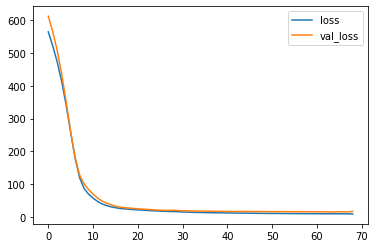

In [71]:
plt.plot(result.epoch, result.history['loss'], label='loss')
plt.plot(result.epoch, result.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

### 4. 평가

In [73]:
md.evaluate(test_x, test_y)

4/4 [==============================] - 0s 3ms/step - loss: 28.0914 - mae: 3.3370


[28.09139060974121, 3.337045907974243]

### 5. 예측
- predict() 함수

In [47]:
md.predict(train_x[:1])

1/1 [==============================] - 0s 156ms/step


array([[19.451025]], dtype=float32)